In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values (0-255 to 0-1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape for neural network (flatten images to 1D arrays)
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

2025-06-10 16:32:13.486648: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-10 16:32:13.500810: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-10 16:32:13.541962: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749569533.611542   10774 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749569533.630954   10774 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1749569533.674918   10774 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax') # 10 output classess (digits 0-9)
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

/home/cyber/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-06-10 16:32:24.954952: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.8636 - loss: 0.4775 - val_accuracy: 0.9615 - val_loss: 0.1412
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9626 - loss: 0.1240 - val_accuracy: 0.9683 - val_loss: 0.1058
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.9772 - loss: 0.0787 - val_accuracy: 0.9710 - val_loss: 0.1064
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9840 - loss: 0.0541 - val_accuracy: 0.9730 - val_loss: 0.0886
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9866 - loss: 0.0428 - val_accuracy: 0.9680 - val_loss: 0.1112


In [3]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9660 - loss: 0.1069
Test accuracy: 0.9718


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


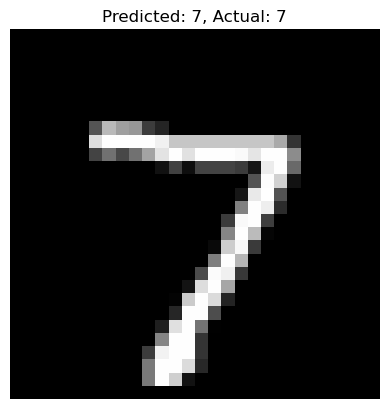

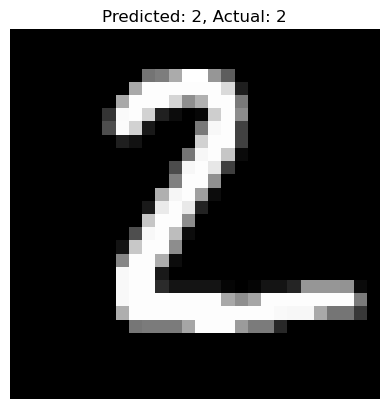

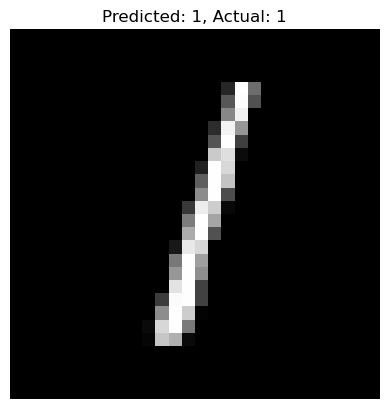

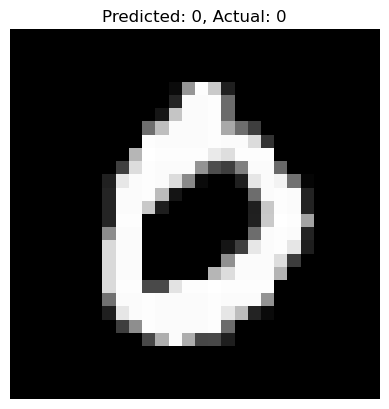

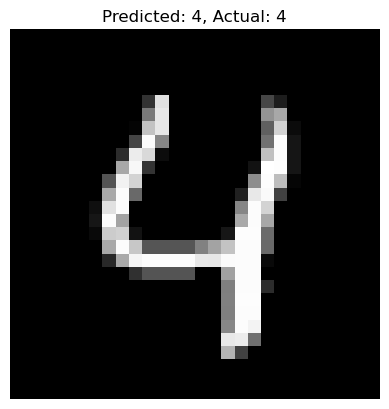

In [4]:
import matplotlib.pyplot as plt

# Make predictions
predictions = model.predict(x_test[:5])
predicted_classes = np.argmax(predictions, axis=1)

# Plot predictions
for i in range(5):
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_classes[i]}, Actual: {y_test[i]}")
    plt.axis("off")
    plt.show()

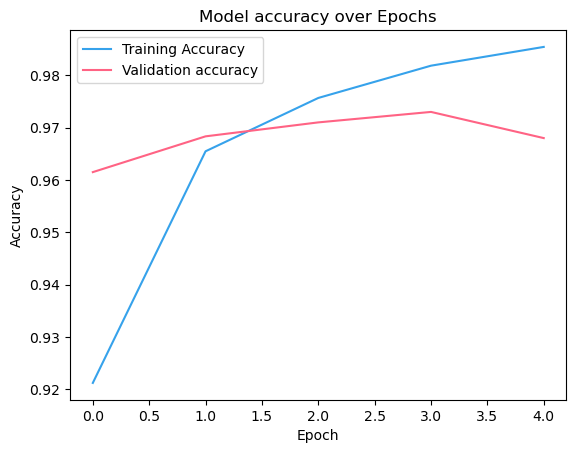

In [5]:
# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy', color='#36A2EB')
plt.plot(history.history['val_accuracy'], label ='Validation accuracy', color='#FF6384')
plt.title('Model accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()